#Todo
- Rajouter une section profiling
- Comparer les performances
- Comparer les résultats avec d'autres algos

In [19]:
# Parameters used by the notebook

%matplotlib inline

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'][:] = [5, 5]

# Line Segment Detector

Dans cette section, nous vous proposons d'appliquer ce que vous avez appris sur Python pour implémenter une version simplifiée du **Line Segment Detector** proposé par *R. Grompone von Gioi et al.* en 2012.  

Nous vous renvoyons vers la page IPOL du détecteur contenant une démo en ligne, le codes sources ainsi qu'un papier d'analyse des performances de ce détecteur :
http://www.ipol.im/pub/art/2012/gjmr-lsd/

## Fonctions utiles
Dans cette partie nous définissons plusieurs fonctions qui nous serons utiles pour le reste du TP.

In [20]:
def generate_synthetic_data(alpha=0.):
    """Generate a synthetic image to test the LSD detector.
    
    Parameters
    ----------
    alpha: float
        Noise intensity between [0. 1.]
    
    Returns
    ------
    im_out: array-like, shape (101, 101) 
        Floating image containing a white square in the middle corrupted by a random noise
    """
    im_out = alpha * np.random.rand(101, 111)
    im_out[24:76, 24:86] += 1. - alpha
    return im_out

In [40]:
def imshow(im):
    """Plot the image."""
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

In [45]:
def plt_gradient(vertical_gradient, horizontal_gradient):
    gradient = np.sqrt(vertical_gradient**2 + horizontal_gradient**2)
    theta = np.arctan2(vertical_gradient, horizontal_gradient)
    
    # Plot the gradient norm
    plt.figure(figsize=(10,10))
    ax = plt.subplot(121)
    ax.imshow(gradient, cmap='viridis')
    ax = plt.subplot(122)
    ax.imshow(theta, cmap='hsv')
    

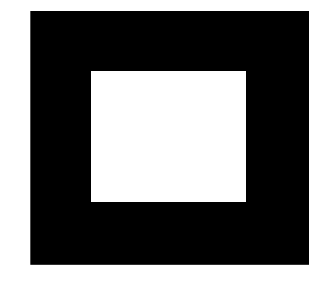

In [46]:
im = generate_synthetic_data()
imshow(im)

## Calcul du gradient de l'image

Pour détecter les contours, nous allons avoir besoin de calculer le vecteur gradient associé à chaque pixels de l'image. 

**Exercice :** Complétez la fonction suivante :

In [51]:
from scipy.ndimage import convolve

def compute_gradient(im):
    """Compute the gradient vector of an image.
    
    Parameters
    ----------
    
    im: array-like, shape (width, length)
    
    Returns
    -------
    vertical_gradient: array-like, shape (widht, length)
        Gradient values for the vertical direction.
    
    horizont_gradient: arrya-like, shape (widht, length)
        Gradient values for the horizontal direction.
    """
    # Kernel utiliser pour calculer le gradient de l'image
    vertical_edge_kernel = np.array([[-1, 1], [-1, 1]])
    horizontal_edge_kernel = np.array([[-1, -1], [1, 1]])
    
    # Exercice : Calculez vertical_gradient et horizontal_gradient
    vertical_gradient = convolve(im, horizontal_edge_kernel)
    horizontal_gradient = convolve(im, vertical_edge_kernel)
    
    return vertical_gradient, horizontal_gradient

**Exercice : **Pour être sur que `compute_gradient` se comporte correctement, tester la fonction pour différentes images.

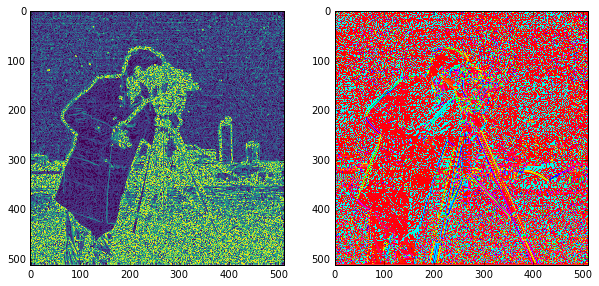

In [50]:
from skimage import data
from skimage.io import imread
# Tester la fonction compute_gradient pour différentes images et valeurs de sigma.

#im_orig = generate_synthetic_data() 
im_orig = data.camera()
#im_orig = imread('lsd-project/input/lsd_molecule.png') 

#grad_v, grad_h = compute_gradient()
plt_gradient(*compute_gradient(im_orig))


**Exercice : **Reporter les changements effectués précédement dans le fichier `filename` et ajoutez les tests unitaires correspondant au cas détecter précédement dans le fichier `test_filename`.

## Detection de lignes
Pour minimiser l'impact du bruit sur le calcul des gradient, nous allons filtré l'image avec un filtre gaussien de variance `sigma` 

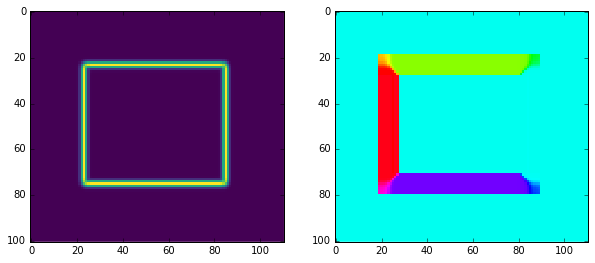

In [58]:
from skimage import filters

im_orig = generate_synthetic_data()
    
sigma = 1
gradient = compute_gradient(filters.gaussian(im_orig, sigma=sigma))
plt_gradient(*gradient)